In [2]:
import pandas as pd
weather_df = pd.read_csv("archive/WeatherData.csv")  # 날짜에 따른 날씨 정보가 들어있음
# print(weather_df.info())
# merge를 위해 날짜를 calendar_date에서 date로 변경
weather_df = weather_df.rename(columns={'calendar_date':'date'})
weather_df['date'] = pd.to_datetime(weather_df['date'])
weather_df = weather_df.groupby(['date']).mean()
weather_df = weather_df[['avg_temperature', 'precipitation']]
weather_df

,avg_temperature,precipitation
date,,
2016-01-01,4.266071,0.669811
2016-01-02,6.489286,1.148148
2016-01-03,8.208929,1.259259
2016-01-04,7.746429,0.382353
2016-01-05,6.283929,2.228814
...,...,...
2017-05-27,17.925000,4.651786
2017-05-28,18.558929,0.860000
2017-05-29,20.941071,0.127660


In [3]:
storeinfo_df = pd.read_csv("archive/air_store_info.csv") #상점 정보(음식점 분류)가 들어있음
storeinfo_df = storeinfo_df[['air_store_id', 'air_genre_name']]
print(storeinfo_df.head())

           air_store_id  air_genre_name
0  air_0f0cdeee6c9bf3d7  Italian/French
1  air_7cc17a324ae5c7dc  Italian/French
2  air_fee8dcf4d619598e  Italian/French
3  air_a17f0778617c76e2  Italian/French
4  air_83db5aff8f50478e  Italian/French


In [4]:
visit_df = pd.read_csv("archive/air_visit_data.csv")  # 상점 방문객 수가 들어있음 
# print(visit_df) 
# merge를 위해 날짜를 visit_date에서 date로 변경
visit_df = visit_df.rename(columns={'visit_date':'date'})
visit_df['date'] = pd.to_datetime(visit_df['date'])
visit_df = visit_df[['air_store_id', 'date', 'visitors']]

In [5]:
store_df = pd.merge(visit_df, storeinfo_df, on='air_store_id', how='left')

#print(store_df)
#print(weather_df)

store_weather_df = pd.merge(store_df, weather_df, on='date', how='left')
print(store_weather_df)
print(store_weather_df.info())

                air_store_id       date  visitors air_genre_name  \
0       air_ba937bf13d40fb24 2016-01-13        25     Dining bar   
1       air_ba937bf13d40fb24 2016-01-14        32     Dining bar   
2       air_ba937bf13d40fb24 2016-01-15        29     Dining bar   
3       air_ba937bf13d40fb24 2016-01-16        22     Dining bar   
4       air_ba937bf13d40fb24 2016-01-18         6     Dining bar   
...                      ...        ...       ...            ...   
252103  air_24e8414b9b07decb 2017-04-18         6          Other   
252104  air_24e8414b9b07decb 2017-04-19         6          Other   
252105  air_24e8414b9b07decb 2017-04-20         7          Other   
252106  air_24e8414b9b07decb 2017-04-21         8          Other   
252107  air_24e8414b9b07decb 2017-04-22         5          Other   

        avg_temperature  precipitation  
0              2.517857       2.413793  
1              2.985714       3.586207  
2              2.216071       0.563636  
3              2.47

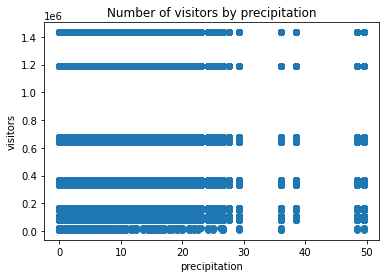

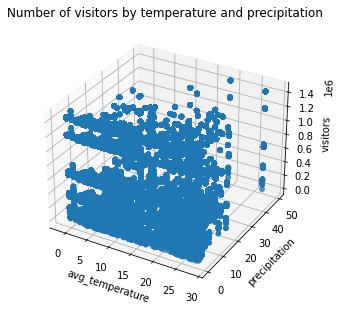

In [8]:
import numpy as np
### 1. 온도, 강수량, 방문객 수를 넘파이 배열로 생성 ###
avg_temperature = np.array(store_weather_df['avg_temperature'])
visitors = np.array(store_weather_df['visitors'])
precipitation = np.array(store_weather_df['precipitation'])
avg_temperature = (avg_temperature.reshape(-1,1))
visitors = (visitors.reshape(-1,1))
precipitation = (precipitation.reshape(-1,1))

import matplotlib.pyplot as plt
### 2. 2D 그래프 -  강수량에 따른 방문객 수 ###
plt.scatter(precipitation, visitors)
plt.xlabel("precipitation")
plt.ylabel("visitors")
plt.title("Number of visitors by precipitation")


### 3. 3D 그래프 - 온도와 강수량에 따른 방문객 수 ###
fig = plt.figure(figsize=(5, 5))
ax = plt.axes(projection="3d")
ax.scatter(avg_temperature, precipitation, visitors)
ax.set_xlabel("avg_temperature")
ax.set_ylabel("precipitation")
ax.set_zlabel("visitors")
plt.title("Number of visitors by temperature and precipitation")
plt.show()

In [207]:
import sklearn
from sklearn import *
x_train,x_test,y_train,y_test= sklearn.model_selection.train_test_split(precipitation,visitors,test_size=0.2, shuffle=True, random_state=0)
model = sklearn.linear_model.LinearRegression()
model.fit(precipitation,visitors)
print(model.score(precipitation, visitors))

0.0022835233863592874


In [14]:
store_df = store_df.groupby(['air_genre_name']).sum()
# store_df = store_df.rename(columns={'visitors':'st_visitors'})
store_df

store_weather_df = pd.merge(store_weather_df, store_df, on='air_genre_name', how='left')


st_visitors = np.array(store_df['visitors'])
st_visitors

air_genre_name = np.array(store_df.index.tolist())
air_genre_name

#store_df.reset_index(drop = False, inplace=True)
# store_df.plot()

# #store_df = store_df[['air_genre_name','visitors']]


# #air_genre_name = np.delete(air_genre_name,(0), axis = 0)
# st_visitors = (visitors.reshape(-1,1))
# print(st_visitors)
# #print(air_genre_name)

# #visitors.dtype

# import matplotlib.pyplot as plt
# plt.plot(air_genre_name, st_visitors)
# plt.scatter(air_genre_name, st_visitors)

#plt.xlabel("air_genre_name")
#plt.ylabel("visitors")

#visit_df['visitors']


array(['Asian', 'Bar/Cocktail', 'Cafe/Sweets', 'Creative cuisine',
       'Dining bar', 'International cuisine', 'Italian/French', 'Izakaya',
       'Japanese food', 'Karaoke/Party', 'Okonomiyaki/Monja/Teppanyaki',
       'Other', 'Western food', 'Yakiniku/Korean food'], dtype='<U28')

In [410]:
store_df = pd.merge(visit_df, storeinfo_df, on='air_store_id', how='left')

In [ ]:
import sklearn
from sklearn import *
model = sklearn.linear_model.LogisticRegression(random_state = 0, solver='liblinear')
model.fit(air_genre_name,visitors)
pred = model.predict(air_genre_name)
print(pred)
plt.scatter(air_genre_name, pred, label = "", c = "blue")
plt.title("Number of visitors by precipitation")
plt.xlabel("precipitation")
plt.ylabel("visitors")
plt.legend(loc='best')